# TPM034A Machine Learning for socio-technical systems 
## `Assignment 02: Artificial Neural Networks`

**Delft University of Technology**<br>
**Q2 2022**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

### `Instructions`

**Assignments aim to:**<br>
* Examine your understanding of the key concepts and techniques.
* Examine your the applied ML skills.

**Assignments:**<br>
* Are graded and must be submitted (see the submission instruction below). 

### `Workspace set-up`
**Option 1: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [1]:
#!git clone https://github.com/TPM34A/Q2_2022
#!pip install -r Q2_2022/requirements_colab.txt
#!mv "/content/Q2_2022/Assignments/assignment_02/data" /content/data

**Option 2: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [2]:
#!pip install -r requirements.txt

## `Application: Predicting the effects of a car ban in the city centre of Leeds` <br>

### **Introduction**
The city of Leeds, in the United Kingdom, is considering implementing a ban on private cars in the city center. Nowadays, car-free city centres are increasingly popular in Western European countries. As cars produce various externalities, including traffic accidents, air pollution, and noise pollution, a car ban has the potential to make the city centre more attractive and a better place to live and do business.

Your assignment is to inform the decision-makers in Leeds about the effects of a car ban. Specifically, the city of Leeds does not yet know the extent to which a car ban would shift the mode shares of trips going to the city centre. This information is vital to assess the viability and effectiveness of the car ban policy under consideration.

To inform the decision-makers in Leeds, in this assignment you will:
1. Create a model that predicts the mode choices, given a set of travel characteristics. Specifically, you will train a neural network based on observed travel patterns. 
2. Use your trained model to predict the effect of the car ban policy on mode shares for trips going to the city centre.<br>

### **Data**

You have access to three data sets:
1. Travel patterns and modes choice data. These data are obtained from a so-called revealed-preference survey, see a description of this data [here](https://link.springer.com/article/10.1007/s11116-018-9858-7)
1. Zones of Leeds (GIS)
1. Mode shares per zone in Leeds, derived from the two other datasets.
<br>

`IMPORTANT`<br>
These data are exclusively made available by its owners for **educational purposes**.<br> 
You are **NOT** allowed to **share or further distribute** these data with anyone other than those involved in TPM034A.

### **Notes**
- The description of each column of revealed-preference dataset is [here](data/model_average_RP_description.pdf)
- In revealed-preference dataset considers as *numerical travel features*: 'avail_car', 'avail_taxi', 'avail_bus' 'avail_rail', 'avail_cycling', 'avail_walking', 'total_car_cost', 'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg', 'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km' 'cycling_distance_km', 'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min' 'bus_IVT_time_min', 'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min' 'bus_transfers', 'rail_transfers'.
- Each row in the zone dataset (2nd dataset) corresponds to an individual zone in Leeds, and contains 4 different columns. The description of each column is shown in the following able:


| Column   | Description                                                                                                                                                                                                  |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LSOA11CD | Zone Code                                                                                                                                                                                                    |
| LSOA11NM | Zone Name                                                                                                                                                                                                    |
| Region   | Region Code, corresponds to a bigger region formed by a set of zones. Values = {'C': Center region, 'R': Ring center region, 'NW': North-West region, 'NE': North-East , 'SW': South-West, 'SE': South-East}  |
| geometry | Polygonal geometry of each zone                                                                                                                                                                              |


### **Tasks and grading**

Your assignment is divided into 4 subtasks: (1) Data preparation, (2) Data exploration, (3) Model training, and (4) Assessment of the impact of the car ban policy on mode shares. In total, 10 points can be earned in this assignment. The weight per subtask is shown below. 

1.  **Data preparation: Load datasets and make a first inspection** [1 pnt]
    1. Load the two dataset using Pandas and GeoPandas.
    1. Check the structure of both datasets e.g. using `df.head()` or `df.describe()`.
    1. Handle the NaN values. I.e. only keep only trips where the **destination** is known.
    1. Create a map that shows the six regions of Leeds (C, R, NW, NE, SW, SE) in separate colors.
1. **Data exploration: discover and visualise pattern of mobility data.** [3 pnt] 
    1. For each zone, count the number of times that zone is a destination (hint: use the pandas *groupby* method). Create a visualisation showing the statistical distribution of these counts, using a histogram. What can you say about this distribution? 
    1. Create a visualisation showing the spatial distribution of these counts. To do so, merge this count dataframe with the geographic delination of zones.
    1. Create a figure with 2 subplots showing the mode share of 'Car' (left) and of 'Bus' (right) in every destination zone in regions R and C, and interpret the results.<br> For your convenience, we have preprocessed the data for you. That is, we have added mode shares per destination zone. (Use the same color scale for the two maps)
1. **Model training: Train a MultiLayerPerceptron (MLP) neural network to predict the choices** [3 pnt]
    1. Use the *numerical travel features* (see notes above) and the following two categorical features: purpose and destination regions. Remember: (1) to scale all variables appropriately before training your MLP, and (2) to encode categorical variables.  (hint: use the pandas **get_dummies** method to encode the categorical variables).
    1. Tune the hyperparameters of your MLP. That is, do a gridsearch over the following hyperparameter space:
        - Architecture: {1 HL w/30 nodes, 2 HL w/ 5 nodes}
        - Alpha parameter: {0.1, 0.001}
        - Learning rate: {0.01, 0.001}
    1. Fit a MLP model, using the optimal hyperparameters found and report and interpret the following output metrics:
        - accuracy
        - cross-entropy
        - confusion matrix.
1. **Assess the impact of a car ban policy on mode shares** [3 pnt]
    1. Benchmark scenario: Create a new dataframe containing only trips with a destination in region C. Predict the mode shares for these trips, using your trained model. Use the *predict_proba* function from sk-learn, why should you NOT use the *predict* function in this case?
    1. Car-ban scenario: In the dataset created in 4.1 set *avail_car* to zero. Use your trained model to predict the modes. (** Remember to scale the data with the scaler created for training the model**).
    1. Compare your results. That is, analyse how mode shares have changed as a result of the car ban policy.  Create a visualisation representing the shift in mode shares. By which mode have car trips most often been substituted?
    1. Reflect on your analysis. Do you think your analysis are meaningful? Why/why not? What is the main limitation of your analysis?


### **Submission**
- The deadline for this assignment is **Wed, 30 November 2022** 
- Use **Python 3.7 or above**
- You have to submit your work in zip file with the ipynb **(fully executed)** in Brightspace

In [3]:
# Import required Python packages and modules
import os
import pandas as pd
import geopandas as gpd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

# Import selected functions and classes from Python packages
from os import getcwd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, log_loss, matthews_corrcoef, make_scorer, classification_report

# Setting
pd.set_option('display.max_columns', None)

### 1. Data preparation: Load datasets and make a first inspection [1 pnt]
#### 1.1. Load the two dataset using Pandas and GeoPandas

In [4]:
# Load datasets 

#load gpkg files 
zones_df       = gpd.read_file('data/Leeds_zones.gpkg')
mode_share_df = gpd.read_file('data/mode_shares_per_zones.gpkg')

#load csv files
choice_df      = pd.read_csv('data/RP_mode_choice_data.csv')

#### 1.2. Check the structure of both datasets e.g. using `df.head()` or `df.describe()`.

In [5]:
zones_df.head()

,LSOA11CD,LSOA11NM,Region,geometry
0,E01011466,Leeds 094A,SW,"MULTIPOLYGON (((-169221.389 7124159.332, -1692..."
1,E01011467,Leeds 112A,SW,"MULTIPOLYGON (((-169723.032 7129853.761, -1696..."
2,E01011468,Leeds 112B,SE,"MULTIPOLYGON (((-168495.874 7128352.169, -1683..."
3,E01011469,Leeds 094B,SE,"MULTIPOLYGON (((-168806.358 7126652.980, -1687..."
4,E01011470,Leeds 112C,SE,"MULTIPOLYGON (((-168071.065 7127724.677, -1679..."


In [6]:
mode_share_df.head()

,dest_zone,LSOA11NM,Region,car,bus,rail,taxi,cycling,walking,geometry
0,E01011466,Leeds 094A,SW,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-169221.389 7124159.332, -1692..."
1,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.127660,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696..."
2,E01011468,Leeds 112B,SE,0.868421,0.026316,0.0,0.0,0.078947,0.026316,"MULTIPOLYGON (((-168495.874 7128352.169, -1683..."
3,E01011469,Leeds 094B,SE,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-168806.358 7126652.980, -1687..."
4,E01011470,Leeds 112C,SE,0.707317,0.048780,0.0,0.0,0.000000,0.243902,"MULTIPOLYGON (((-168071.065 7127724.677, -1679..."


In [7]:
#choice_df.head()
choice_df.describe()

,ID,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg
count,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.00000,10120.000000,10120.000000,10120.000000,10120.000000,10120.0,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000
mean,209.087154,0.949209,0.882016,0.037055,0.536462,0.894763,0.912253,0.293972,0.393577,0.414822,1.48705,8.176251,0.703953,0.099012,0.197036,0.0,0.570257,4.420553,0.953458,0.877866,0.784190,0.469071,0.236759,0.076186,10.214526,0.658498,1.025198,2.032115,1.880435,3.677767,8.187036,8.263779,8.793072,8.187036,7.787197,6.917595,14.507041,34.258783,27.498263,14.507041,27.578936,86.799125,21.085789,9.638679,11.696016,11.319931,2.741206,0.310474,0.305138,5.600791,2.463035,4.011445
std,123.632098,0.703772,1.220648,0.306259,0.498693,0.306874,0.282941,0.455602,0.488567,0.492716,1.99885,6.023259,0.456535,0.298693,0.397779,0.0,0.495064,1.545442,0.210665,0.327457,0.411404,0.499067,0.425114,0.265308,4.338632,0.474237,0.896049,0.863129,1.333407,2.571292,10.251698,10.834636,12.956229,10.251698,10.241815,8.863201,11.168158,33.983737,34.696266,11.168158,34.271404,110.294250,23.829168,6.521604,15.733929,12.020327,2.118657,0.584621,0.690149,2.674324,2.077650,6.858895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00100,2.713000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.010000,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,105.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.36600,4.531750,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.283000,1.767750,1.415000,2.283000,1.772750,1.599500,6.683333,12.566667,0.000000,6.683333,6.866667,20.133333,4.000000,5.183333,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.500000,0.000000
50%,207.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.72000,6.041500,1.000000,0.000000,0.000000,0.0,1.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.544000,4.502000,3.981500,4.544000,4.208500,3.902000,10.816667,24.683333,19.966667,10.816667,15.558333,49.075000,13.000000,8.500000,7.000000,8.583333,2.000000,0.000000,0.000000,5.000000,2.300000,2.071233
75%,315.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.62425,9.324750,1.000000,0.000000,0.000000,0.0,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,1

#### 1.3. Handle the NaN values. I.e. only keep trips where the **destination** is known.

In [8]:
# Check whether the dataframes contain nan values 
zones_df.isnull().sum()
mode_share_df.isnull().sum().nlargest(10)
choice_df.isnull().sum().nlargest(10)

Destination_lsoa_code    3097
Destination_lsoa_name    3097
Origin_lsoa_code         2478
Origin_lsoa_name         2478
ID                          0
purpose                     0
n_car                       0
n_bicycle                   0
n_motorcycle                0
avail_car                   0
dtype: int64

In [9]:
#Create a function to clean the destination part of the data 
def clean_df(df):

    # Remove rows where Destination_lsoa_code is NaN
    df.dropna(subset = ['Destination_lsoa_code'], inplace = True)

    return df

choice_df = clean_df(choice_df)
choice_df.isnull().sum().nlargest(10)

Origin_lsoa_code    484
Origin_lsoa_name    484
ID                    0
purpose               0
n_car                 0
n_bicycle             0
n_motorcycle          0
avail_car             0
avail_taxi            0
avail_bus             0
dtype: int64

#### 1.4. Create a map that shows the six regions of Leeds (C, R, NW, NE, SW, SE) in separate colors.


<AxesSubplot:>

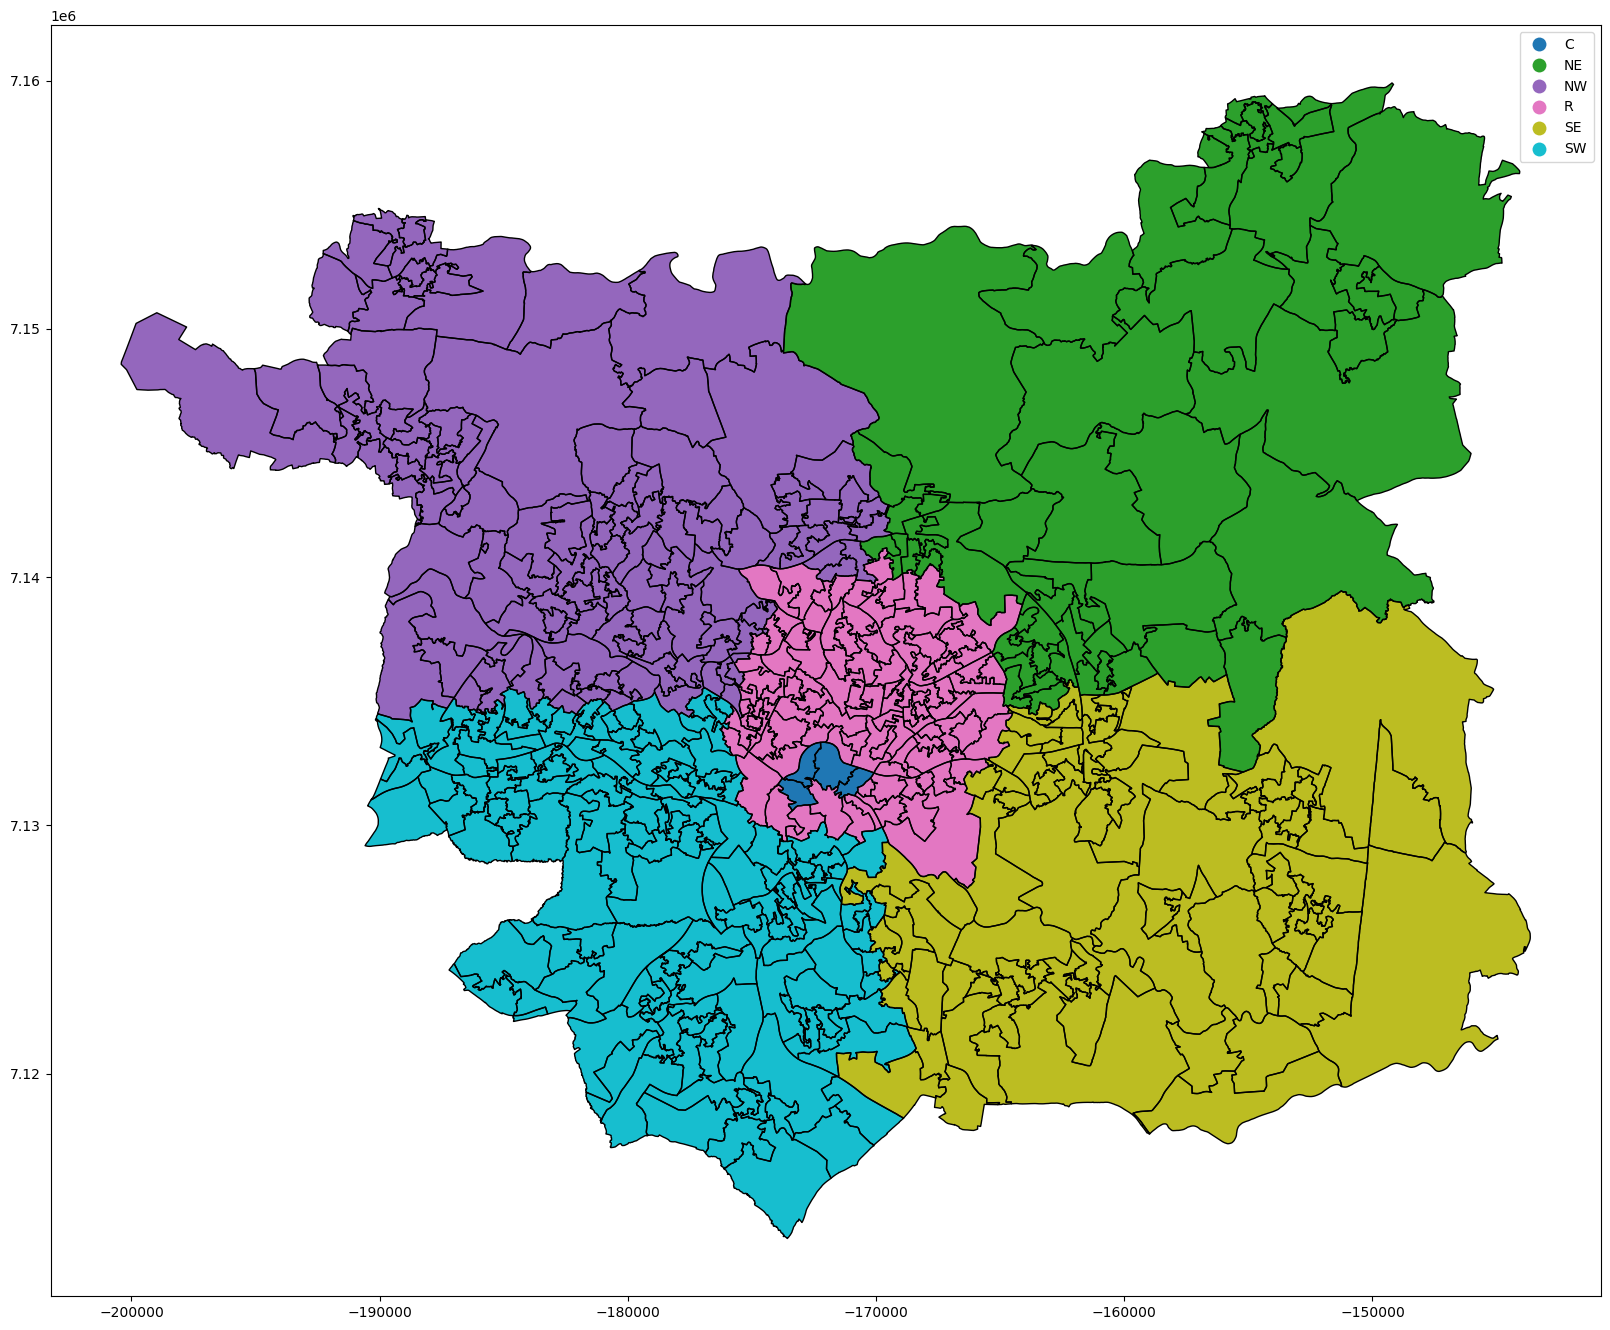

In [10]:
# Look at the regions and the zones they have 
fig, ax = plt.subplots(figsize=(20,20))
zones_df.plot(ax=ax, column = 'Region', legend = True)
zones_df.plot(ax=ax, color  = 'none', edgecolor='black')

### 2. Data exploration: discover and visualise mobility patterns. [3 pnt]
#### 2.1 For each zone, count the number of times that zone is a destination (hint: use the pandas *groupby* method). Create a visualisation showing the statistical distribution of these counts, using a histogram. What can you say about this distribution?

In [11]:
#Use groupby to count the number of times a zone is a destination 
count_df = choice_df.groupby(by="Destination_lsoa_name", as_index = False).count()
count_df.head() 

,Destination_lsoa_name,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code
0,Leeds 001A,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,9
1,Leeds 001E,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,4
2,Leeds 002A,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,Leeds 002B,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Leeds 002C,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,13,13,15


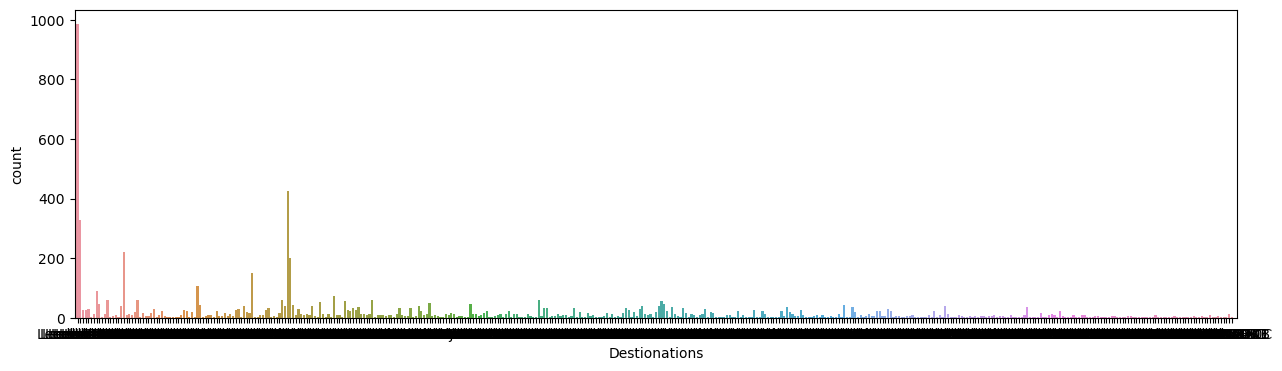

In [12]:
# Visualize the counts of each destination 
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
axes = sns.countplot(x = "Destination_lsoa_name", data = choice_df)
axes.set_xlabel('Destionations') 

axes.set_xlim(-1,425) #Change the x lim so the first point is visible 

plt.show()

##### What can you say about this distribution?
From this distribution it can be seen some destinations are very frequent compared to the others. The other destinations seem to be similarly present in the dataframe, but this is not very visible from the image, so no conclusions can be drawn. 

#### 2.2 Create a visualisation showing the *spatial* distribution of these counts. To do so, merge this count dataframe with the geographic delination of zones.

In [13]:
# Rename the bu_code column to make merging possible 
mode_share_df = mode_share_df.rename(columns={"LSOA11NM": "Destination_lsoa_name"}) 

# Merge the geographical dataframe with the ID column of the count dataframe, as this column contains the count. 
spatial_count_df = mode_share_df.merge(count_df[['Destination_lsoa_name','ID']], on ="Destination_lsoa_name", how = "outer")

# Rename the column ID, as it represents the count of a destination 
spatial_count_df = spatial_count_df.rename(columns={"ID": "Count_destination"}) 

# Replace nan with 0, as a nan means a destination is not used. 
spatial_count_df = spatial_count_df.replace([float('nan')], float(0))

spatial_count_df.head()

,dest_zone,Destination_lsoa_name,Region,car,bus,rail,taxi,cycling,walking,geometry,Count_destination
0,E01011466,Leeds 094A,SW,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-169221.389 7124159.332, -1692...",0.0
1,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.127660,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696...",47.0
2,E01011468,Leeds 112B,SE,0.868421,0.026316,0.0,0.0,0.078947,0.026316,"MULTIPOLYGON (((-168495.874 7128352.169, -1683...",38.0
3,E01011469,Leeds 094B,SE,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-168806.358 7126652.980, -1687...",0.0
4,E01011470,Leeds 112C,SE,0.707317,0.048780,0.0,0.0,0.000000,0.243902,"MULTIPOLYGON (((-168071.065 7127724.677, -1679...",41.0


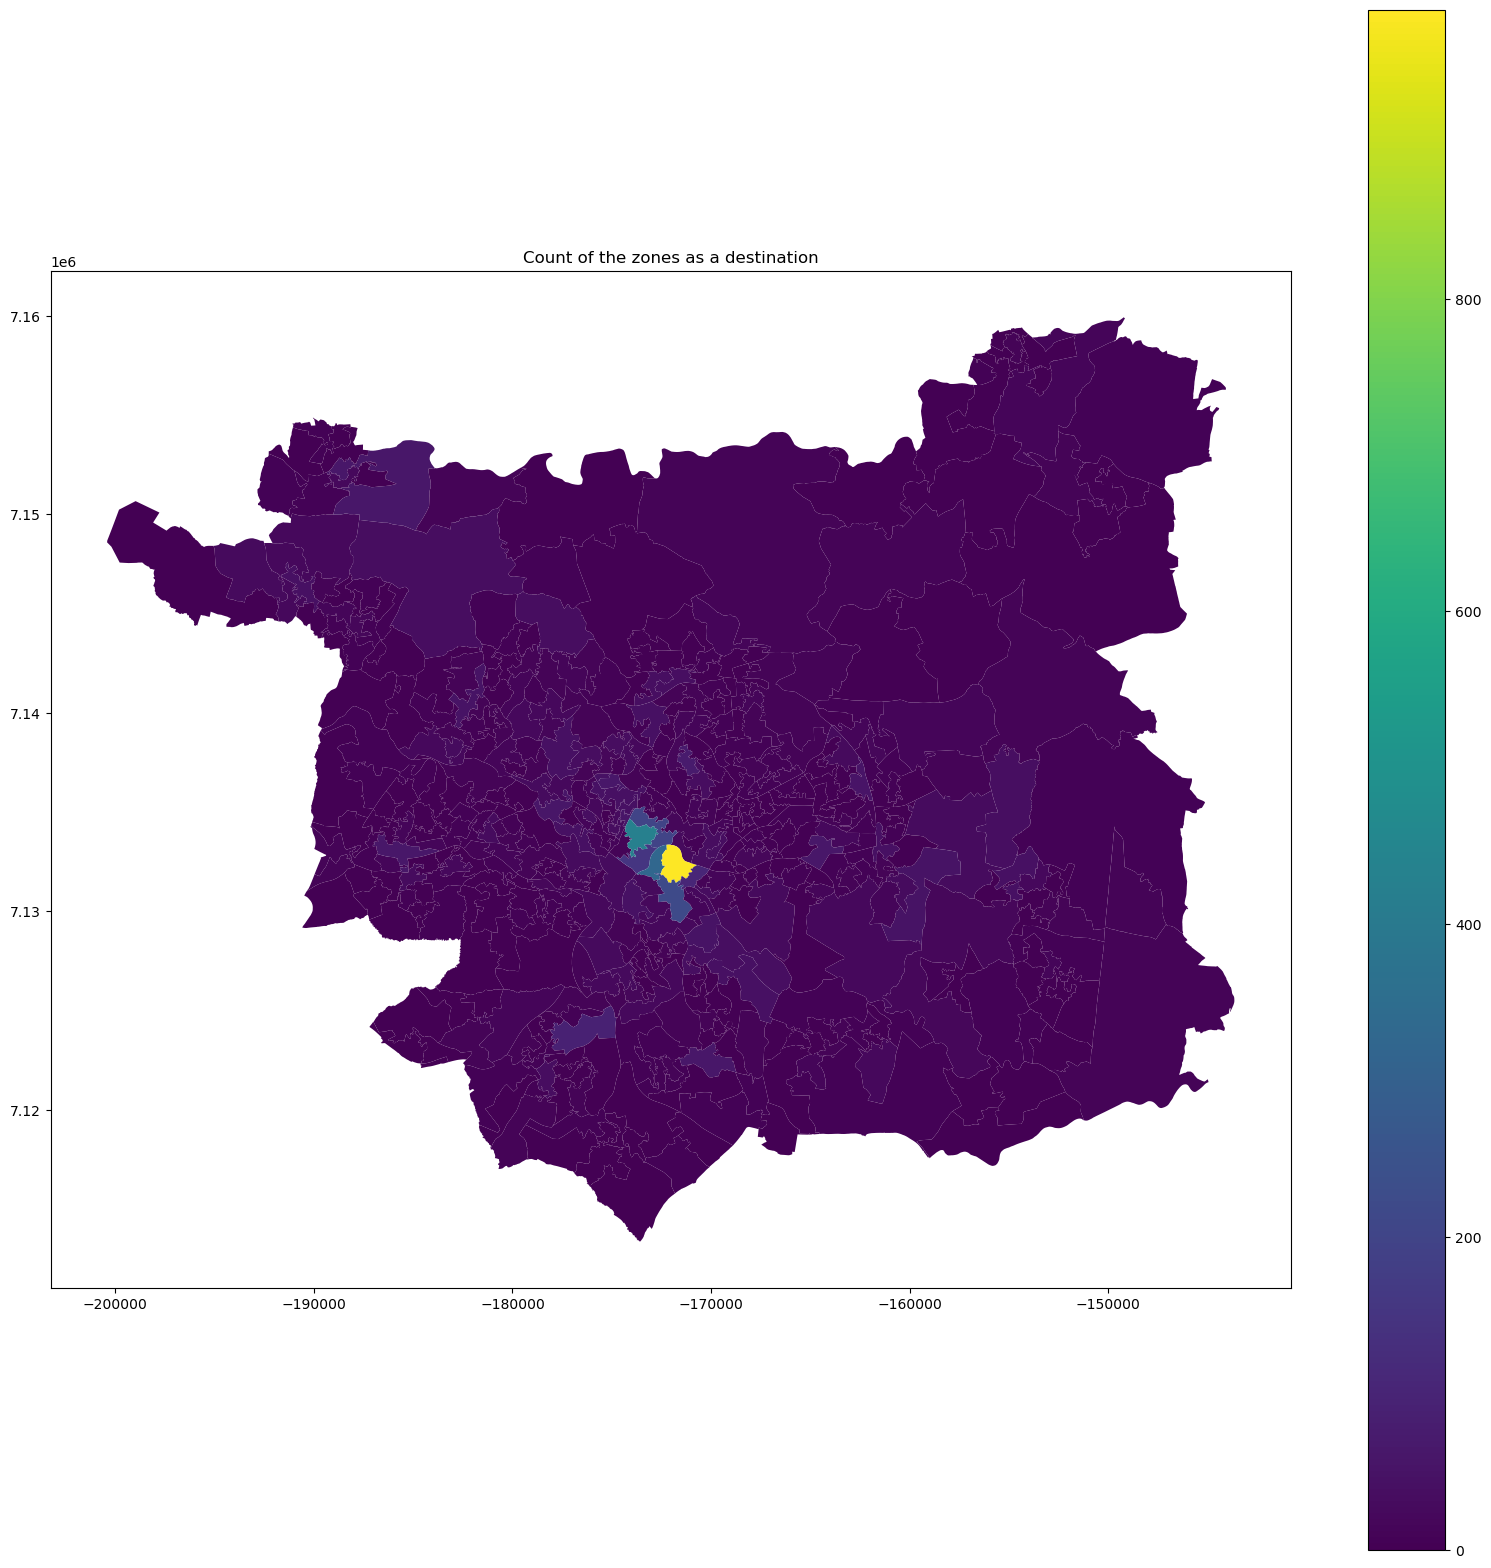

In [14]:
# Visualisation of the spatial distribution of these counts
fig, ax = plt.subplots(figsize=(20,20))
spatial_count_df.plot(ax=ax, column = 'Count_destination', legend = True)

plt.title('Count of the zones as a destination')

plt.show()

#### 2.3. Create a figure with 2 subplots showing the mode share of 'Car' (left) and of 'Bus' (right) in every destination zone in regions R and C, and interpret the results.<br> For your convenience, we have preprocessed the data for you. That is, we have added mode shares per destination zone. (Use the same color scale for the two maps)

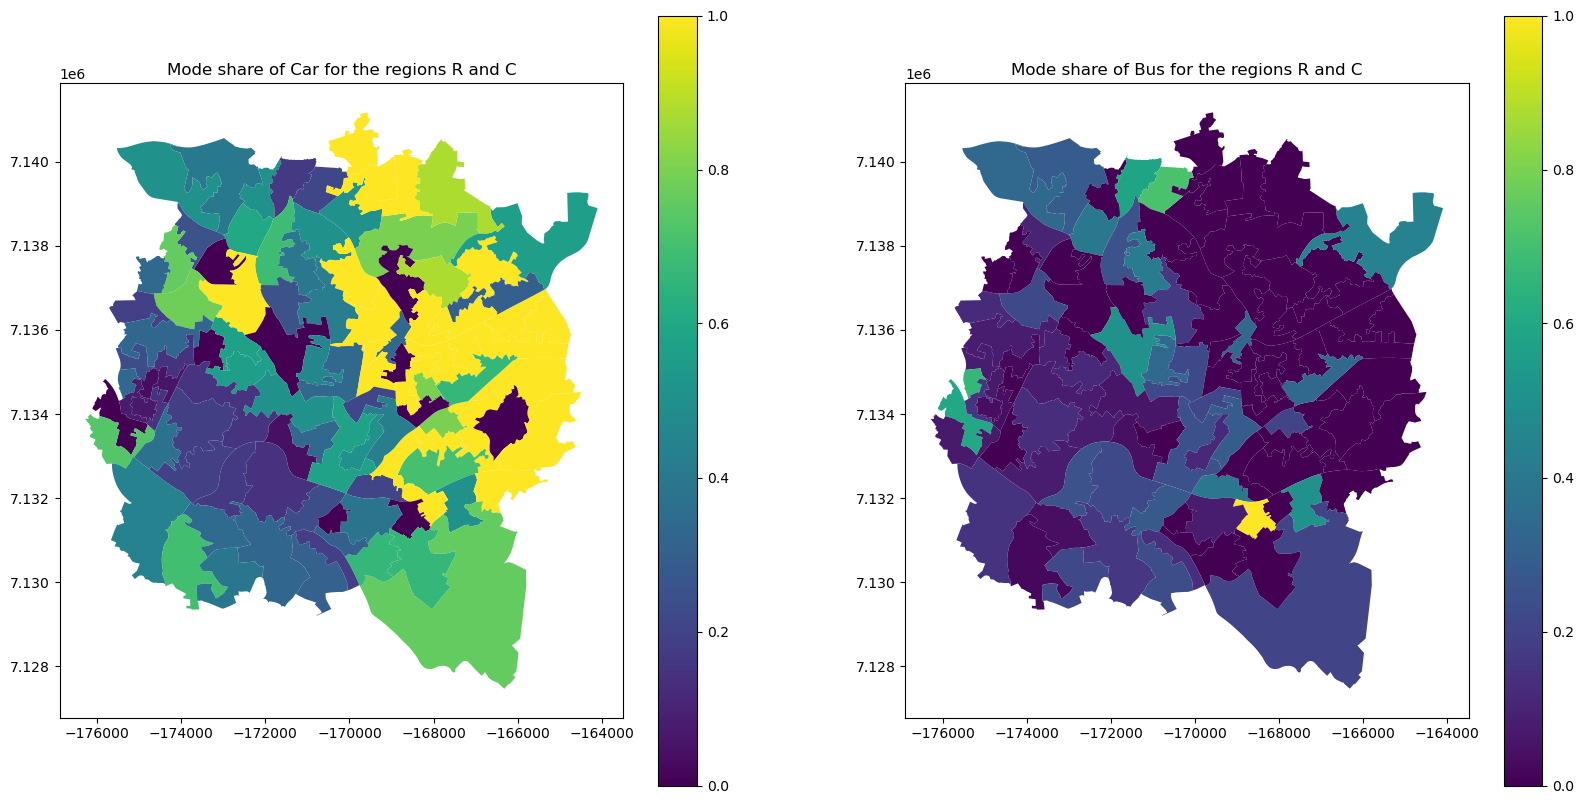

In [15]:
# Create a figure of the mode share of Car and Bus
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
spatial_count_df.loc[(spatial_count_df.Region ==  'R') | (spatial_count_df.Region ==  'C') ].plot(ax=axes[0], column = 'car', legend = True)
spatial_count_df.loc[(spatial_count_df.Region ==  'R') | (spatial_count_df.Region ==  'C') ].plot(ax=axes[1], column = 'bus', legend = True)

axes[0].set_title('Mode share of Car for the regions R and C')
axes[1].set_title('Mode share of Bus for the regions R and C')

plt.show()

The Car is used much more than the bus. Mainly the East of the R and C region has a lot of car shares. One area has a high mode share of bus. It could be that this area is well connected to the bus lanes.

### 3. Model training: Train a MultiLayerPerceptron (MLP) neural network to predict the choices [3 pnt]

#### 3.1. Use the *numerical travel features* (see notes above) and the following two categorical features: purpose and destination regions. Remember: (1) to scale all variables appropriately before training your MLP, and (2) to encode categorical variables.  (hint: use the pandas **get_dummies** method to encode the categorical variables)

In [16]:
# Merge the mode share and choice dataframes
spatial_choice_df = mode_share_df.merge(choice_df, on ="Destination_lsoa_name", how = "inner")
spatial_choice_df.head()

,dest_zone,Destination_lsoa_name,Region,car,bus,rail,taxi,cycling,walking,geometry,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code
0,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.12766,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696...",62,Social,1,0,0,1,1,1,1,0,0,0.878,7.570,Monday,1,0,0,0,1,2,1,1,1,0,0,0,13,0,0,3,1,1,6.830,5.414,7.336,6.830,6.680,5.467,15.033333,40.750000,49.333333,15.033333,21.816667,68.300000,18.883333,15.283333,8.250000,33.000000,1,1.0,1.0,1,4.600000,9.6,E01011444,Leeds 110C,E01011467
1,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.12766,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696...",84,Work Related,1,1,0,1,1,1,0,1,0,0.698,6.780,Monday,1,0,0,0,1,2,1,1,1,0,1,0,7,1,3,1,3,2,5.441,4.003,4.003,5.441,4.511,3.653,13.916667,22.966667,22.966667,13.916667,15.466667,45.433333,13.000000,9.950000,13.000000,9.950000,1,0.0,0.0,11,0.414247,2.3,E01033010,Leeds 111B,E01011467
2,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.12766,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696...",86,Grocery,1,1,0,1,1,1,0,1,0,0.751,7.139,Friday,1,0,0,0,1,4,1,0,0,0,0,1,12,1,1,3,1,3,6.109,5.218,4.596,6.109,5.306,4.596,14.250000,44.133333,0.000000,14.250000,18.483333,56.466667,31.216667,7.666667,0.000000,0.000000,1,1.0,0.0,6,4.600000,0.0,E01033006,Leeds 063E,E01011467
3,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.12766,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696...",86,Grocery,1,1,0,1,1,1,0,1,1,0.483,5.513,Saturday,1,0,0,0,1,4,1,0,0,0,0,1,12,1,1,3,1,3,3.668,2.780,2.520,3.668,2.888,2.597,9.966667,15.516667,16.633333,9.966667,10.933333,33.266667,9.450000,5.883333,6.366667,10.066667,1,0.0,0.0,6,2.300000,2.3,E01033011,Leeds 111C,E01011467
4,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.12766,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696...",91,Work Related,2,1,0,1,1,1,0,1,0,0.706,6.679,Tuesday,1,0,0,0,1,7,1,0,0,1,0,0,7,0,0,2,1,2,5.506,4.123,3.853,5.506,4.828,3.657,12.616667,23.550000,23.916667,12.616667,17.133333,45.866667,11.933333,11.616667,10.250000,13.666667,1,0.0,0.0,5,2.300000,2.3,E01033008,Leeds 111A,E01011467


In [17]:
# Create dummies for the categorical data Region and purpose
spatial_choice_df_dummy = pd.get_dummies(spatial_choice_df, columns = ['Region','purpose'])
spatial_choice_df_dummy.head()

print("\n The information in the spatial choice dataframe is: \n",list(spatial_choice_df_dummy.keys()),'\n')


 The information in the spatial choice dataframe is: 
 ['dest_zone', 'Destination_lsoa_name', 'car', 'bus', 'rail', 'taxi', 'cycling', 'walking', 'geometry', 'ID', 'n_car', 'n_bicycle', 'n_motorcycle', 'avail_car', 'avail_taxi', 'avail_bus', 'avail_rail', 'avail_cycling', 'avail_walking', 'total_car_cost', 'taxi_cost', 'day_of_the_week_start', 'city.leeds', 'city.westyorkshire', 'city.elsewhereuk', 'city.na', 'female', 'age', 'british_origin', 'o_level', 'a_level', 'voc_qual', 'masters', 'phd', 'occ', 'occ_full_time', 'nb_hh_employed', 'mar', 'hh_size', 'income_perso', 'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km', 'cycling_distance_km', 'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min', 'bus_IVT_time_min', 'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min', 'choice', 'bus_transfers', 'rail_transfers', 'inc

In [44]:
spatial_choice_df_dummy.dtypes

dest_zone                        object
Destination_lsoa_name            object
car                             float64
bus                             float64
rail                            float64
                                 ...   
purpose_Vocational education      uint8
purpose_Work Other                uint8
purpose_Work Related              uint8
purpose_Work Travel               uint8
purpose_Work Volunteer            uint8
Length: 103, dtype: object

In [18]:
# Create the list of features that we want to use in the model
num_travel_features = ['avail_car', 'avail_taxi', 'avail_bus', 'avail_rail', 'avail_cycling', 'avail_walking', 
            'total_car_cost', 'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg', 
            'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km', 'cycling_distance_km', 
            'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 
            'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min', 'bus_IVT_time_min', 
            'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min' ,'bus_transfers', 
            'rail_transfers', 
            'Region_C', 'Region_NE', 'Region_NW', 'Region_R', 'Region_SE', 'Region_SW', 
            'purpose_Cinema or other night out', 'purpose_Clothes shopping', 'purpose_College/University', 
            'purpose_Dropoff Daycare', 'purpose_Dropoff K12', 'purpose_Dropoff Other', 
            'purpose_Dropoff Scheduled Activity', 'purpose_Dropoff Work', 'purpose_Errand Other', 
            'purpose_Errands with Appointment', 'purpose_Errands without Appointment', 'purpose_Exercise', 
            'purpose_Family Activity', 'purpose_Gas', 'purpose_Grocery', 'purpose_Home', 'purpose_K-12 School', 
            'purpose_Leisure Other', 'purpose_Medical', 'purpose_Museum/cultural', 'purpose_OtherPurpose', 
            'purpose_Primary Workplace', 'purpose_Restaurant', 'purpose_Shopping - Major', 'purpose_Social', 
            'purpose_Sports activity', 'purpose_Vacation/Travel', 'purpose_Vocational education', 
            'purpose_Work Other', 'purpose_Work Related', 'purpose_Work Travel', 'purpose_Work Volunteer']

X = spatial_choice_df_dummy.loc[:,num_travel_features]

# Initiate scaler object & fit to data
scaler = StandardScaler()  
scaler.fit(X)  

# Create new dataframe X_scaled containg the scaled features 
X_scaled = scaler.transform(X)

# Create the target
Y = spatial_choice_df['choice']

In [46]:
pd.set_option('display.max_rows', 100) #set to 100 to show all nan values within the final dataframes 

In [47]:
X.dtypes

avail_car                                int64
avail_taxi                               int64
avail_bus                                int64
avail_rail                               int64
avail_cycling                            int64
avail_walking                            int64
total_car_cost                         float64
taxi_cost                              float64
bus_cost_total_per_leg                 float64
rail_cost_total_per_leg                float64
car_distance_km                        float64
bus_distance_km                        float64
rail_distance_km                       float64
taxi_distance_km                       float64
cycling_distance_km                    float64
walking_distance_km                    float64
car_travel_time_min                    float64
bus_travel_time_min                    float64
rail_travel_time_min                   float64
taxi_travel_time_min                   float64
cycling_travel_time_min                float64
walking_trave

#### 3.2 Tune the hyperparameters of your MLP. That is, do a gridsearch over the following hyperparameter space:
        - Architecture: {1 HL w/30 nodes, 2 HL w/ 5 nodes}
        - Alpha parameter: {0.1, 0.001}
        - Learning rate: {0.01, 0.001}

In [19]:
# Split the data using sk-learn's `train_test_split` function
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state = 12345, test_size = 0.4)

# Create MLP object
mlp_gs = MLPClassifier(activation = 'tanh', solver='adam', batch_size=250, max_iter=2000)

# Define the hyperparameter search space
hyperparameter_space = {
    'hidden_layer_sizes': [(30),(5,5)],
    'alpha': [0.1,1e-2],
    'learning_rate_init': [0.01,0.001]}

# Create scoring function
logloss = make_scorer(log_loss, greater_is_better = False, needs_proba = True)

# Create the grid_search object, with using the MLP classifier
folds = 5 # Number of cross validation splits
mlp_gridsearch = GridSearchCV(mlp_gs, hyperparameter_space, n_jobs=-1, cv=folds,scoring = logloss)

In [20]:
mlp_gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', batch_size=250,
                                     max_iter=2000),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01],
                         'hidden_layer_sizes': [30, (5, 5)],
                         'learning_rate_init': [0.01, 0.001]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [21]:
# Save the model 
pickle.dump(mlp_gridsearch, open('data/ad_tuned_model.sav','wb'))

#### 3.3 Fit a MLP model, using the optimal hyperparameters found and report and interpret the following output metrics:
        - Accuracy
        - Cross-entropy
        - Confusion matrix

In [22]:
# Create a function that returns the accuracy and the cross entropy, for the train and test data sets
def calculate_acc_ce(mlp,X_train,Y_train,X_test, Y_test):
    
    def calculate_acc(mlp,X,Y):
        accuracy = mlp.score(X,Y)
        return accuracy

    def calculate_ce(mlp,X,Y):
        # Compute cross entropy
        # Use the model object to predict probabilities per class
        prob = mlp.predict_proba(X)

        # Multiply the probabilities with Y (0/1 array), and sum along the row axis to obtain the predicted probability of the target
        Y_dummy = pd.get_dummies(Y).to_numpy()
        prob_chosen = np.sum(prob*Y_dummy,axis=1)    
        
        # Take the logarithm
        log_prob_chosen = np.log(prob_chosen)

        # Compute the cross entropy
        cross_entropy = -np.sum(log_prob_chosen)/len(Y)
        return cross_entropy

    # Compute the accuracy
    acc_train = calculate_acc(mlp,X_train,Y_train)
    acc_test  = calculate_acc(mlp,X_test,Y_test)

    # Apply cross entropy function
    ce_train = calculate_ce(mlp,X_train,Y_train)
    ce_test = calculate_ce(mlp,X_test,Y_test)
    return acc_train, acc_test, ce_train, ce_test 

Best hyperparameters found:	 {'alpha': 0.1, 'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.001}
Best model performance:		 0.47994134778130515


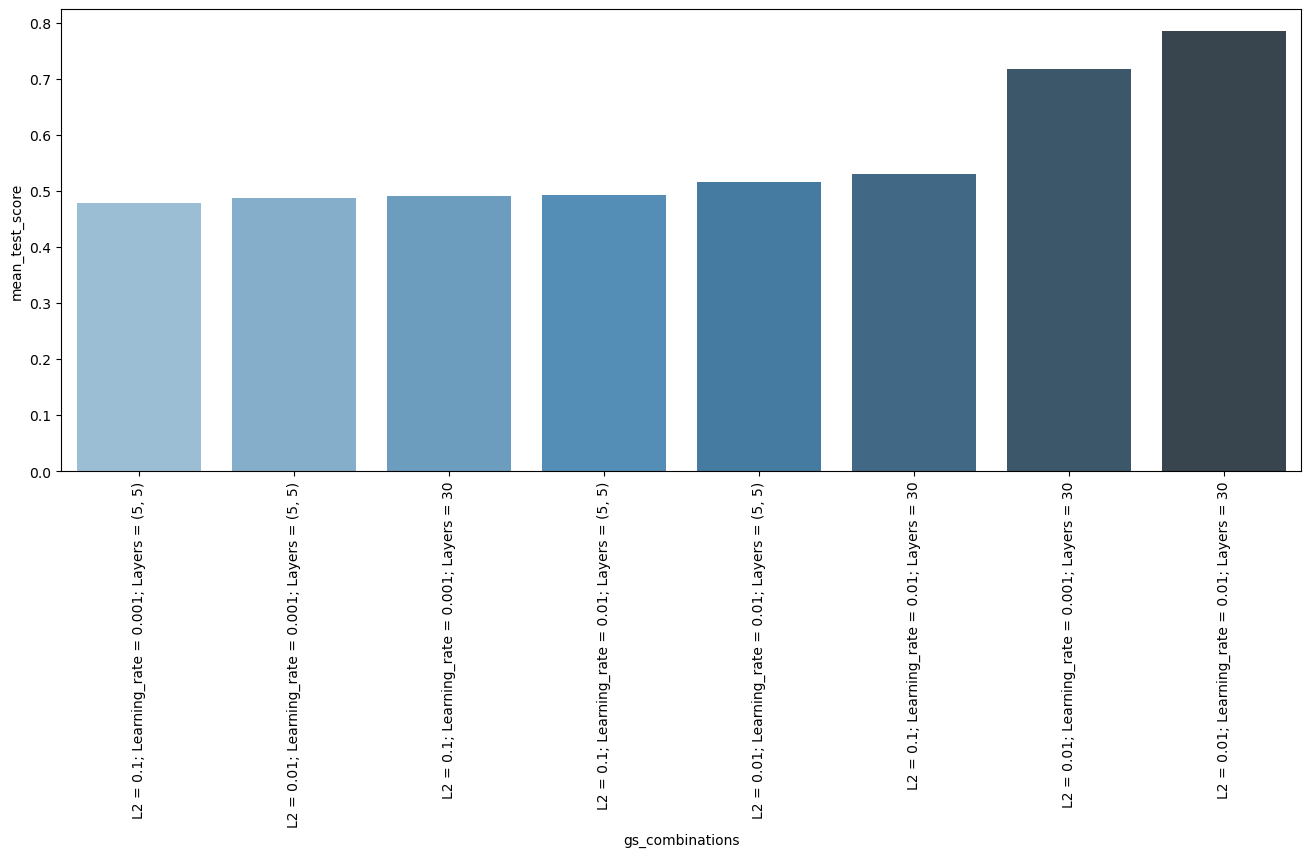

In [23]:
# Collect results into a new pandas dataframe 
df_gridsearch = pd.DataFrame.from_dict(mlp_gridsearch.cv_results_)
    
# Add new column with a label for the hyperparameter combinations  
df_gridsearch['gs_combinations'] = 'L2 = '+ df_gridsearch['param_alpha'].astype('str') + '; Learning_rate = '+ df_gridsearch['param_learning_rate_init'].astype('str') + '; Layers = ' + df_gridsearch['param_hidden_layer_sizes'].astype('str')
df_gridsearch = df_gridsearch.sort_values('rank_test_score')

# Visualise deviation in performance across hyper parameter settings
plt.figure(figsize = (16,6))
ax = sns.barplot(x = df_gridsearch.gs_combinations,y=-df_gridsearch.mean_test_score,palette="Blues_d",)
plt.xticks(rotation=90)

print('Best hyperparameters found:\t', mlp_gridsearch.best_params_)
print('Best model performance:\t\t', -mlp_gridsearch.best_score_)

In [25]:
# Create a new mlp object using the optimised hyperparameters, just using the train/test split
layers = mlp_gridsearch.best_params_['hidden_layer_sizes']
lr = mlp_gridsearch.best_params_['learning_rate_init']
alpha = mlp_gridsearch.best_params_['alpha']
mlp_gs = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = lr, alpha=alpha, batch_size=250, activation = 'tanh', max_iter = 2000) 

# Train the model
mlp_gs.fit(X_train,Y_train)

MLPClassifier(activation='tanh', alpha=0.1, batch_size=250,
              hidden_layer_sizes=(5, 5), max_iter=2000)

In [26]:
# Evaluate performance of the hypertuned model using the evaluation function
accuracy_train_gs, accuracy_test_gs, cross_entropy_train_gs, cross_entropy_test_gs = calculate_acc_ce(mlp_gs,X_train,Y_train,X_test, Y_test)

# Report results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_train_gs:0.3f}\t\t {accuracy_test_gs:0.3f}')
print(f'Cross entropy\t {cross_entropy_train_gs:0.3f}\t\t {cross_entropy_test_gs:0.3f}')

		 Train set	 Test set
Accuracy	 0.890		 0.868
Cross entropy	 0.336		 0.413


The accuracy is high. There is small overfitting, but this is minimal.\
The entropy does get worse with the test set compared to the train set. 

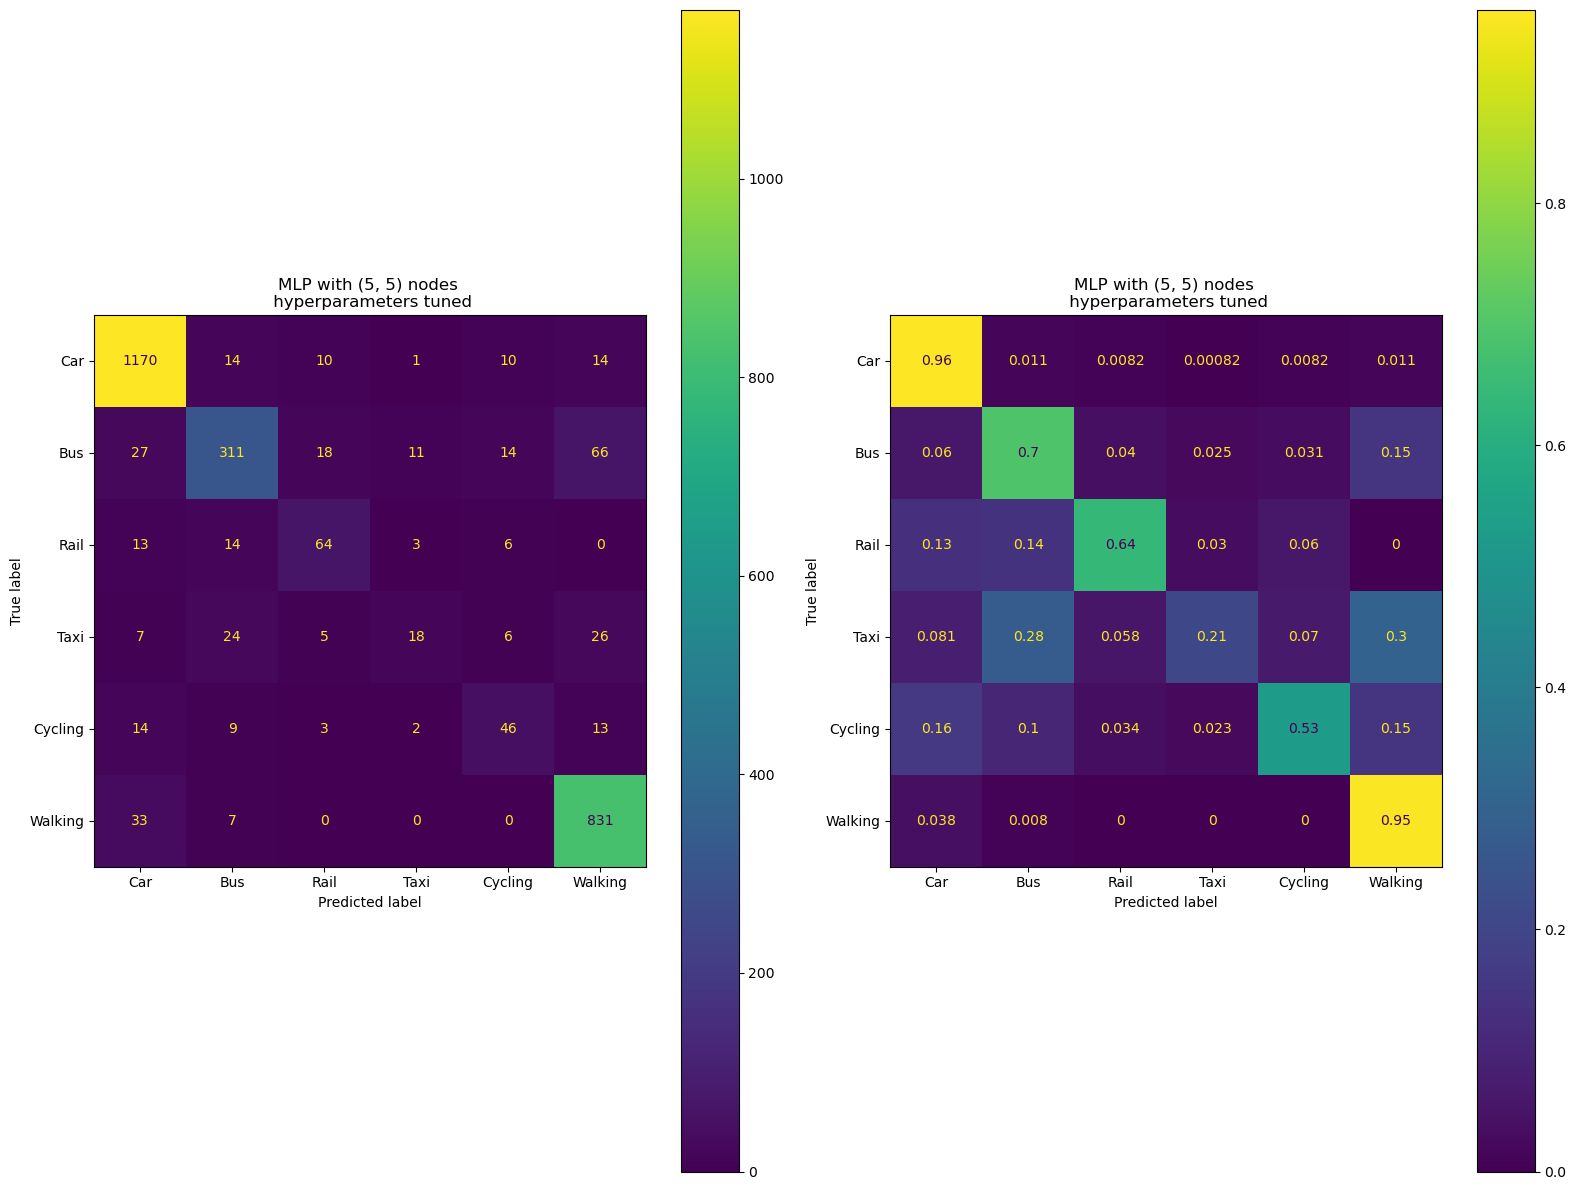

In [27]:
# Create a confusion matrix 
Y_pred_gs = mlp_gs.predict(X_test)

# Show the confusion matrices
fig, ax = plt.subplots(1,2,figsize = (16,12))
fig.set_tight_layout(True)
ylabels = ['Car', 'Bus', 'Rail', 'Taxi','Cycling','Walking']
cm1 = ConfusionMatrixDisplay.from_predictions(y_true=Y_test,y_pred=Y_pred_gs, display_labels = ylabels, normalize=None,  ax=ax[0])
cm2 = ConfusionMatrixDisplay.from_predictions(y_true=Y_test,y_pred=Y_pred_gs, display_labels = ylabels, normalize='true',ax=ax[1])

# Add titles
cm1.ax_.set_title(f'MLP with {mlp_gs.hidden_layer_sizes} nodes \n hyperparameters tuned')
cm2.ax_.set_title(f'MLP with {mlp_gs.hidden_layer_sizes} nodes \n hyperparameters tuned')

plt.show()

In [28]:
# To calculate the precision and recal score we conveniently use sk-learn's 'classification_report' functionality
print('\nClassification report for MLP with hyperparameters tuned\n',classification_report(Y_test,Y_pred_gs, target_names= ylabels))


Classification report for MLP with hyperparameters tuned
               precision    recall  f1-score   support

         Car       0.93      0.96      0.94      1219
         Bus       0.82      0.70      0.75       447
        Rail       0.64      0.64      0.64       100
        Taxi       0.51      0.21      0.30        86
     Cycling       0.56      0.53      0.54        87
     Walking       0.87      0.95      0.91       871

    accuracy                           0.87      2810
   macro avg       0.72      0.66      0.68      2810
weighted avg       0.86      0.87      0.86      2810



The model is well in predicting the car choice, which can be expected as this is the largest dataset. 

### 4.Assess the impact of a car ban policy on mode shares [3 pnt]
#### 4.1. Benchmark scenario: create a new dataframe containing only trips with a destination in region C. Predict the mode shares for these trips, using your trained model. Use the *predict_proba* function from sk-learn (why should you NOT use the *predict* function in this case?)

In [29]:
# Only take the destinations in Region C
RegionC_df = spatial_choice_df_dummy.loc[spatial_choice_df_dummy.Region_C ==1]
RegionC_df.head()

,dest_zone,Destination_lsoa_name,car,bus,rail,taxi,cycling,walking,geometry,ID,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Region_C,Region_NE,Region_NW,Region_R,Region_SE,Region_SW,purpose_Cinema or other night out,purpose_Clothes shopping,purpose_College/University,purpose_Dropoff Daycare,purpose_Dropoff K12,purpose_Dropoff Other,purpose_Dropoff Scheduled Activity,purpose_Dropoff Work,purpose_Errand Other,purpose_Errands with Appointment,purpose_Errands without Appointment,purpose_Exercise,purpose_Family Activity,purpose_Gas,purpose_Grocery,purpose_Home,purpose_K-12 School,purpose_Leisure Other,purpose_Medical,purpose_Museum/cultural,purpose_OtherPurpose,purpose_Primary Workplace,purpose_Restaurant,purpose_Shopping - Major,purpose_Social,purpose_Sports activity,purpose_Vacation/Travel,purpose_Vocational education,purpose_Work Other,purpose_Work Related,purpose_Work Travel,purpose_Work Volunteer
5126,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1,1,1,0,1,1,1,1,0,0,2.992,17.451,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,23.163,19.736,22.683,23.163,21.376,17.577,33.950000,87.000000,42.000000,33.950000,67.583333,220.633333,65.750000,4.983333,21.0,16.983333,3,1.0,1.0,6,1.035616,4.065478,NaN,NaN,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5127,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1,1,1,0,0,1,1,1,0,0,10.375,17.035,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.711,21.282,23.110,19.711,21.635,17.378,46.266667,96.533333,54.516667,46.266667,68.666667,218.883333,84.250000,5.500000,18.0,22.500000,3,1.0,1.0,6,1.035616,4.065478,NaN,NaN,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5128,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",6,0,1,0,0,0,1,0,0,1,0.114,3.311,Friday,0,0,1,0,1,2,1,1,1,0,0,0,13,0,2,1,2,1,0.815,0.926,0.836,0.815,0.851,0.836,2.016667,8.083333,0.000000,2.016667,3.800000,10.600000,2.000000,6.083333,0.0,0.000000,6,0.0,0.0,6,1.500000,0.000000,E01011444,Leeds 110C,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5129,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",12,0,0,0,0,1,1,1,0,0,8.939,8.744,Monday,1,0,0,0,1,4,1,1,1,1,0,0,16,1,1,3,1,3,7.192,7.742,9.927,7.192,9.050,6.846,24.766667,37.566667,45.200000,24.766667,28.183333,83.816667,23.966667,12.966667,8.0,37.200000,2,0.0,0.0,6,1.035616,1.035616,E01011330,Leeds 051C,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5130,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",12,0,0,0,0,1,1,1,0,0,7.128,8.623,Thursday,1,0,0,0,1,4,1,1,1,1,0,0,16,1,1,3,1,3,6.950,6.743,9.467,6.950,8.808,6.620,24.733333,27.183333,38.983333,24.733333,27.250000,80.900000,23.466667,3.683333,8.0,30.950000,2,0.0,0.0,6,1.035616,1.035616,E01011325,Leeds 046B,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
# Only take the interested travel features 
X_RegionC = RegionC_df.loc[:,num_travel_features] 

# Create new dataframe X_scaled containg the scaled features with only region C as destination, with the scalar from the model
X_scaled_RegionC = scaler.transform(X_RegionC) 

In [31]:
# Predict the mode shares with the MLP
prob_RegionC = mlp_gs.predict_proba(X_scaled_RegionC)
prob_RegionC

array([[2.45903409e-02, 2.31407322e-01, 6.16417712e-01, 1.16452475e-01,
        1.01384124e-02, 9.93738752e-04],
       [3.81949748e-03, 7.85148848e-01, 1.57849882e-01, 4.35792445e-02,
        6.72207597e-03, 2.88045201e-03],
       [1.65334323e-04, 3.45731892e-02, 1.17458590e-04, 2.74442484e-02,
        1.68947888e-03, 9.36010291e-01],
       ...,
       [3.03990746e-04, 1.35754255e-02, 9.21135722e-01, 5.65094132e-02,
        8.43139360e-03, 4.40551803e-05],
       [6.28667996e-01, 8.34730343e-02, 9.85565929e-06, 1.17048855e-02,
        6.73992206e-03, 2.69404306e-01],
       [7.18966411e-04, 5.99061284e-03, 9.38983223e-07, 6.79481024e-04,
        6.53242725e-03, 9.86077573e-01]])

In [32]:
# Make one check to see whether the probabilities add up to 1 
prob_RegionC[0,0]+prob_RegionC[0,1]+prob_RegionC[0,2]+prob_RegionC[0,3]+prob_RegionC[0,4]+prob_RegionC[0,5]

0.9999999999999999

In [33]:
# Add the probabilities to the dataframe. choices are: 1: car, 2: bus, 3: rail, 4: taxi, 5: cycling, 6: walking.
RegionC_df['prob_car']     = prob_RegionC[:,0]
RegionC_df['prob_bus']     = prob_RegionC[:,1]
RegionC_df['prob_rail']    = prob_RegionC[:,2]
RegionC_df['prob_taxi']    = prob_RegionC[:,3]
RegionC_df['prob_cycling'] = prob_RegionC[:,4]
RegionC_df['prob_walking'] = prob_RegionC[:,5]
RegionC_df.head()

/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,dest_zone,Destination_lsoa_name,car,bus,rail,taxi,cycling,walking,geometry,ID,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Region_C,Region_NE,Region_NW,Region_R,Region_SE,Region_SW,purpose_Cinema or other night out,purpose_Clothes shopping,purpose_College/University,purpose_Dropoff Daycare,purpose_Dropoff K12,purpose_Dropoff Other,purpose_Dropoff Scheduled Activity,purpose_Dropoff Work,purpose_Errand Other,purpose_Errands with Appointment,purpose_Errands without Appointment,purpose_Exercise,purpose_Family Activity,purpose_Gas,purpose_Grocery,purpose_Home,purpose_K-12 School,purpose_Leisure Other,purpose_Medical,purpose_Museum/cultural,purpose_OtherPurpose,purpose_Primary Workplace,purpose_Restaurant,purpose_Shopping - Major,purpose_Social,purpose_Sports activity,purpose_Vacation/Travel,purpose_Vocational education,purpose_Work Other,purpose_Work Related,purpose_Work Travel,purpose_Work Volunteer,prob_car,prob_bus,prob_rail,prob_taxi,prob_cycling,prob_walking
5126,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1,1,1,0,1,1,1,1,0,0,2.992,17.451,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,23.163,19.736,22.683,23.163,21.376,17.577,33.950000,87.000000,42.000000,33.950000,67.583333,220.633333,65.750000,4.983333,21.0,16.983333,3,1.0,1.0,6,1.035616,4.065478,NaN,NaN,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.024590,0.231407,0.616418,0.116452,0.010138,0.000994
5127,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1,1,1,0,0,1,1,1,0,0,10.375,17.035,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.711,21.282,23.110,19.711,21.635,17.378,46.266667,96.533333,54.516667,46.266667,68.666667,218.883333,84.250000,5.500000,18.0,22.500000,3,1.0,1.0,6,1.035616,4.065478,NaN,NaN,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.003819,0.785149,0.157850,0.043579,0.006722,0.002880
5128,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",6,0,1,0,0,0,1,0,0,1,0.114,3.311,Friday,0,0,1,0,1,2,1,1,1,0,0,0,13,0,2,1,2,1,0.815,0.926,0.836,0.815,0.851,0.836,2.016667,8.083333,0.000000,2.016667,3.800000,10.600000,2.000000,6.083333,0.0,0.000000,6,0.0,0.0,6,1.500000,0.000000,E01011444,Leeds 110C,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000165,0.034573,0.000117,0.027444,0.001689,0.936010
5129,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",12,0,0,0,0,1,1,1,0,0,8.939,8.744,Monday,1,0,0,0,1,4,1,1,1,1,0,0,16,1,1,3,1,3,7.192,7.742,9.927,7.192,9.050,6.846,24.766667,37.566667,45.200000,24.766667,28.183333,83.816667,23.966667,12.966667,8.0,37.200000,2,0.0,0.0,6,1.035616,1.035616,E01011330,Leeds 051C,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000053,0.984646,0.000359,0.010442,0.001299,0.003201
5130,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",12,0,0,0,0,1,1,1,0,0,7.128,8.623,Thur

##### Question: why should you NOT use the *predict* function in this case?
Since the *predict* function attributes the option with the highest probability to the choice, you can only see the final prediction of the model. You lose the probabilities, and thereby the distribution of the choices. If there is a 10% change someone takes the train instead of the car, this is usefull to know. 

#### 4.2. Car-ban scenario: in the dataset created in 4.1 set *avail_car* to zero. Use your trained model to predict the modes. (**Remember to scale the data with the scaler created for training the model**).


In [34]:
# Make a copy of the dataframe and set avail_car to 0 
RegionC_carban_df = RegionC_df.copy()
RegionC_carban_df.avail_car = 0
RegionC_carban_df.head()

,dest_zone,Destination_lsoa_name,car,bus,rail,taxi,cycling,walking,geometry,ID,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Region_C,Region_NE,Region_NW,Region_R,Region_SE,Region_SW,purpose_Cinema or other night out,purpose_Clothes shopping,purpose_College/University,purpose_Dropoff Daycare,purpose_Dropoff K12,purpose_Dropoff Other,purpose_Dropoff Scheduled Activity,purpose_Dropoff Work,purpose_Errand Other,purpose_Errands with Appointment,purpose_Errands without Appointment,purpose_Exercise,purpose_Family Activity,purpose_Gas,purpose_Grocery,purpose_Home,purpose_K-12 School,purpose_Leisure Other,purpose_Medical,purpose_Museum/cultural,purpose_OtherPurpose,purpose_Primary Workplace,purpose_Restaurant,purpose_Shopping - Major,purpose_Social,purpose_Sports activity,purpose_Vacation/Travel,purpose_Vocational education,purpose_Work Other,purpose_Work Related,purpose_Work Travel,purpose_Work Volunteer,prob_car,prob_bus,prob_rail,prob_taxi,prob_cycling,prob_walking
5126,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1,1,1,0,0,1,1,1,0,0,2.992,17.451,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,23.163,19.736,22.683,23.163,21.376,17.577,33.950000,87.000000,42.000000,33.950000,67.583333,220.633333,65.750000,4.983333,21.0,16.983333,3,1.0,1.0,6,1.035616,4.065478,NaN,NaN,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.024590,0.231407,0.616418,0.116452,0.010138,0.000994
5127,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1,1,1,0,0,1,1,1,0,0,10.375,17.035,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.711,21.282,23.110,19.711,21.635,17.378,46.266667,96.533333,54.516667,46.266667,68.666667,218.883333,84.250000,5.500000,18.0,22.500000,3,1.0,1.0,6,1.035616,4.065478,NaN,NaN,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.003819,0.785149,0.157850,0.043579,0.006722,0.002880
5128,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",6,0,1,0,0,0,1,0,0,1,0.114,3.311,Friday,0,0,1,0,1,2,1,1,1,0,0,0,13,0,2,1,2,1,0.815,0.926,0.836,0.815,0.851,0.836,2.016667,8.083333,0.000000,2.016667,3.800000,10.600000,2.000000,6.083333,0.0,0.000000,6,0.0,0.0,6,1.500000,0.000000,E01011444,Leeds 110C,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000165,0.034573,0.000117,0.027444,0.001689,0.936010
5129,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",12,0,0,0,0,1,1,1,0,0,8.939,8.744,Monday,1,0,0,0,1,4,1,1,1,1,0,0,16,1,1,3,1,3,7.192,7.742,9.927,7.192,9.050,6.846,24.766667,37.566667,45.200000,24.766667,28.183333,83.816667,23.966667,12.966667,8.0,37.200000,2,0.0,0.0,6,1.035616,1.035616,E01011330,Leeds 051C,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000053,0.984646,0.000359,0.010442,0.001299,0.003201
5130,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",12,0,0,0,0,1,1,1,0,0,7.128,8.623,Thur

In [35]:
X_RegionC_carban = RegionC_carban_df.loc[:,num_travel_features]

# Create new dataframe X_scaled containg the scaled features with the scalar from the model
X_scaled_RegionC_carban = scaler.transform(X_RegionC_carban)

prob_RegionC_carban = mlp_gs.predict_proba(X_scaled_RegionC_carban)
prob_RegionC_carban

array([[2.85847254e-03, 4.18072122e-01, 4.71950930e-01, 9.42048913e-02,
        1.15457935e-02, 1.36779088e-03],
       [3.81949748e-03, 7.85148848e-01, 1.57849882e-01, 4.35792445e-02,
        6.72207597e-03, 2.88045201e-03],
       [1.65334323e-04, 3.45731892e-02, 1.17458590e-04, 2.74442484e-02,
        1.68947888e-03, 9.36010291e-01],
       ...,
       [3.03990746e-04, 1.35754255e-02, 9.21135722e-01, 5.65094132e-02,
        8.43139360e-03, 4.40551803e-05],
       [5.84449685e-04, 1.88151221e-01, 3.68333520e-05, 7.95313506e-03,
        2.61829688e-02, 7.77091392e-01],
       [7.18966411e-04, 5.99061284e-03, 9.38983223e-07, 6.79481024e-04,
        6.53242725e-03, 9.86077573e-01]])

In [36]:
# choice: 1: car, 2: bus, 3: rail, 4: taxi, 5: cycling, 6: walking.
RegionC_carban_df['prob_car']     = prob_RegionC_carban[:,0]
RegionC_carban_df['prob_bus']     = prob_RegionC_carban[:,1]
RegionC_carban_df['prob_rail']    = prob_RegionC_carban[:,2]
RegionC_carban_df['prob_taxi']    = prob_RegionC_carban[:,3]
RegionC_carban_df['prob_cycling'] = prob_RegionC_carban[:,4]
RegionC_carban_df['prob_walking'] = prob_RegionC_carban[:,5]
RegionC_carban_df.head()

,dest_zone,Destination_lsoa_name,car,bus,rail,taxi,cycling,walking,geometry,ID,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Region_C,Region_NE,Region_NW,Region_R,Region_SE,Region_SW,purpose_Cinema or other night out,purpose_Clothes shopping,purpose_College/University,purpose_Dropoff Daycare,purpose_Dropoff K12,purpose_Dropoff Other,purpose_Dropoff Scheduled Activity,purpose_Dropoff Work,purpose_Errand Other,purpose_Errands with Appointment,purpose_Errands without Appointment,purpose_Exercise,purpose_Family Activity,purpose_Gas,purpose_Grocery,purpose_Home,purpose_K-12 School,purpose_Leisure Other,purpose_Medical,purpose_Museum/cultural,purpose_OtherPurpose,purpose_Primary Workplace,purpose_Restaurant,purpose_Shopping - Major,purpose_Social,purpose_Sports activity,purpose_Vacation/Travel,purpose_Vocational education,purpose_Work Other,purpose_Work Related,purpose_Work Travel,purpose_Work Volunteer,prob_car,prob_bus,prob_rail,prob_taxi,prob_cycling,prob_walking
5126,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1,1,1,0,0,1,1,1,0,0,2.992,17.451,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,23.163,19.736,22.683,23.163,21.376,17.577,33.950000,87.000000,42.000000,33.950000,67.583333,220.633333,65.750000,4.983333,21.0,16.983333,3,1.0,1.0,6,1.035616,4.065478,NaN,NaN,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.002858,0.418072,0.471951,0.094205,0.011546,0.001368
5127,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1,1,1,0,0,1,1,1,0,0,10.375,17.035,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.711,21.282,23.110,19.711,21.635,17.378,46.266667,96.533333,54.516667,46.266667,68.666667,218.883333,84.250000,5.500000,18.0,22.500000,3,1.0,1.0,6,1.035616,4.065478,NaN,NaN,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.003819,0.785149,0.157850,0.043579,0.006722,0.002880
5128,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",6,0,1,0,0,0,1,0,0,1,0.114,3.311,Friday,0,0,1,0,1,2,1,1,1,0,0,0,13,0,2,1,2,1,0.815,0.926,0.836,0.815,0.851,0.836,2.016667,8.083333,0.000000,2.016667,3.800000,10.600000,2.000000,6.083333,0.0,0.000000,6,0.0,0.0,6,1.500000,0.000000,E01011444,Leeds 110C,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000165,0.034573,0.000117,0.027444,0.001689,0.936010
5129,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",12,0,0,0,0,1,1,1,0,0,8.939,8.744,Monday,1,0,0,0,1,4,1,1,1,1,0,0,16,1,1,3,1,3,7.192,7.742,9.927,7.192,9.050,6.846,24.766667,37.566667,45.200000,24.766667,28.183333,83.816667,23.966667,12.966667,8.0,37.200000,2,0.0,0.0,6,1.035616,1.035616,E01011330,Leeds 051C,E01033008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000053,0.984646,0.000359,0.010442,0.001299,0.003201
5130,E01033008,Leeds 111A,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",12,0,0,0,0,1,1,1,0,0,7.128,8.623,Thur

#### 4.3. Compare your results. That is, analyse how mode shares have changed as a result of the car-ban policy. Create a visualisation representing the shift in mode shares. By which mode have car trips most often been substituted?

Text(0.5, 1.0, 'Mode share of Car with car ban ')

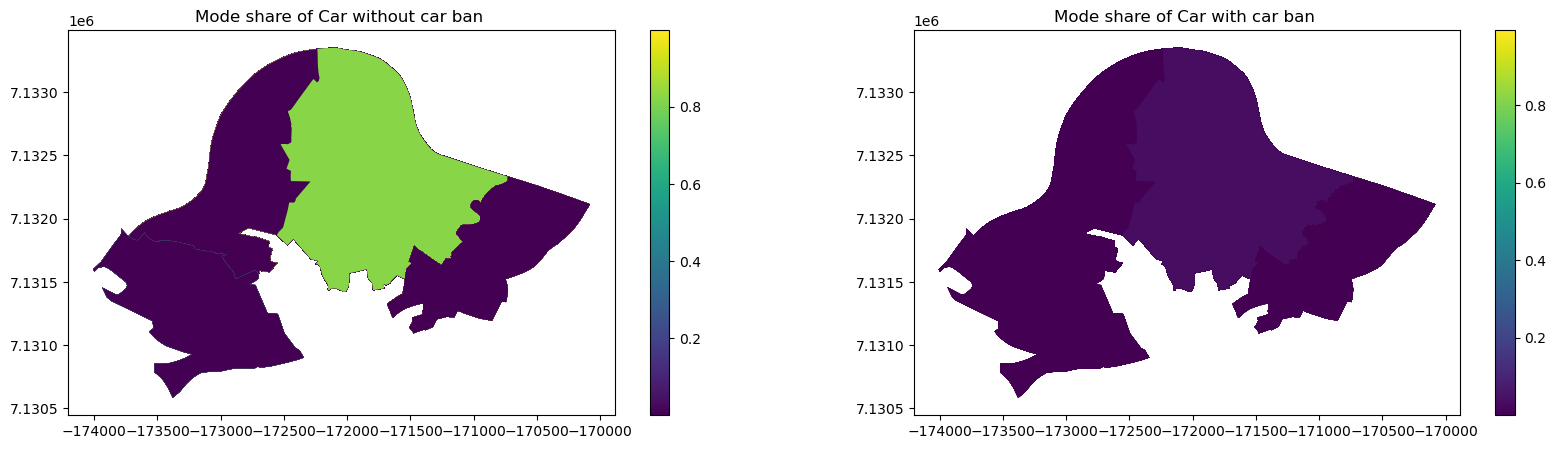

In [37]:
# Plot the average values of car probability per section in the Region C with and without car ban
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
RegionC_df.plot(ax=axes[0], column = 'prob_car', legend = True)
RegionC_carban_df.plot(ax=axes[1], column = 'prob_car', legend = True)

axes[0].set_title('Mode share of Car without car ban ')
axes[1].set_title('Mode share of Car with car ban ')

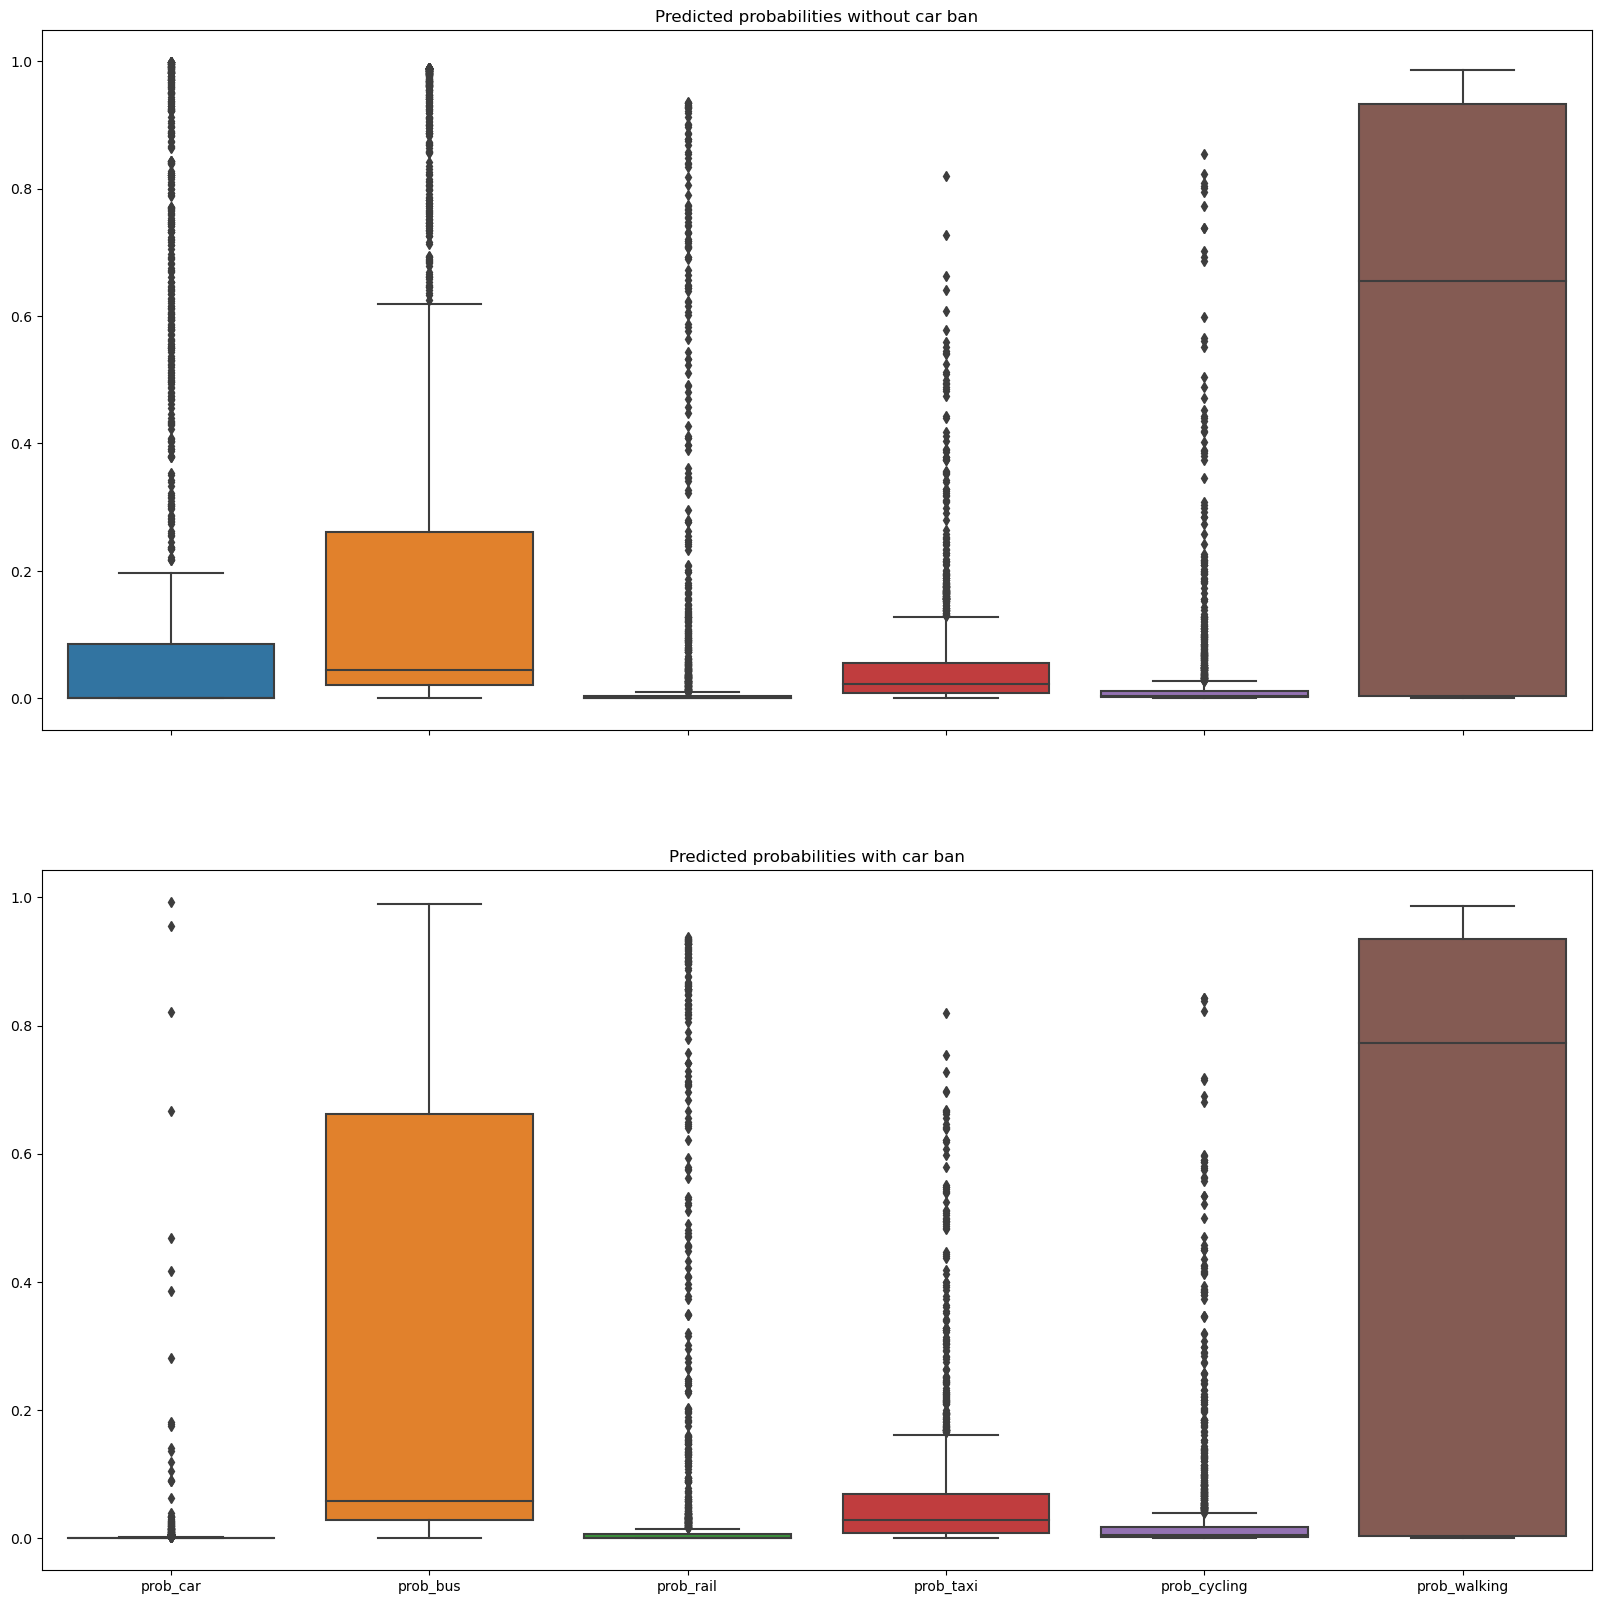

In [38]:
# Create boxplots of the distributions before and after the car ban
fig, axes = plt.subplots(2, 1, figsize=(20, 20), sharex=True)
sns.boxplot(ax = axes[0], data=RegionC_df.loc[:,('prob_car', 'prob_bus','prob_rail','prob_taxi', 'prob_cycling','prob_walking')])
sns.boxplot(ax = axes[1], data=RegionC_carban_df.loc[:,('prob_car', 'prob_bus','prob_rail','prob_taxi', 'prob_cycling','prob_walking')])

axes[0].set_title('Predicted probabilities without car ban')
axes[1].set_title('Predicted probabilities with car ban')

plt.show()

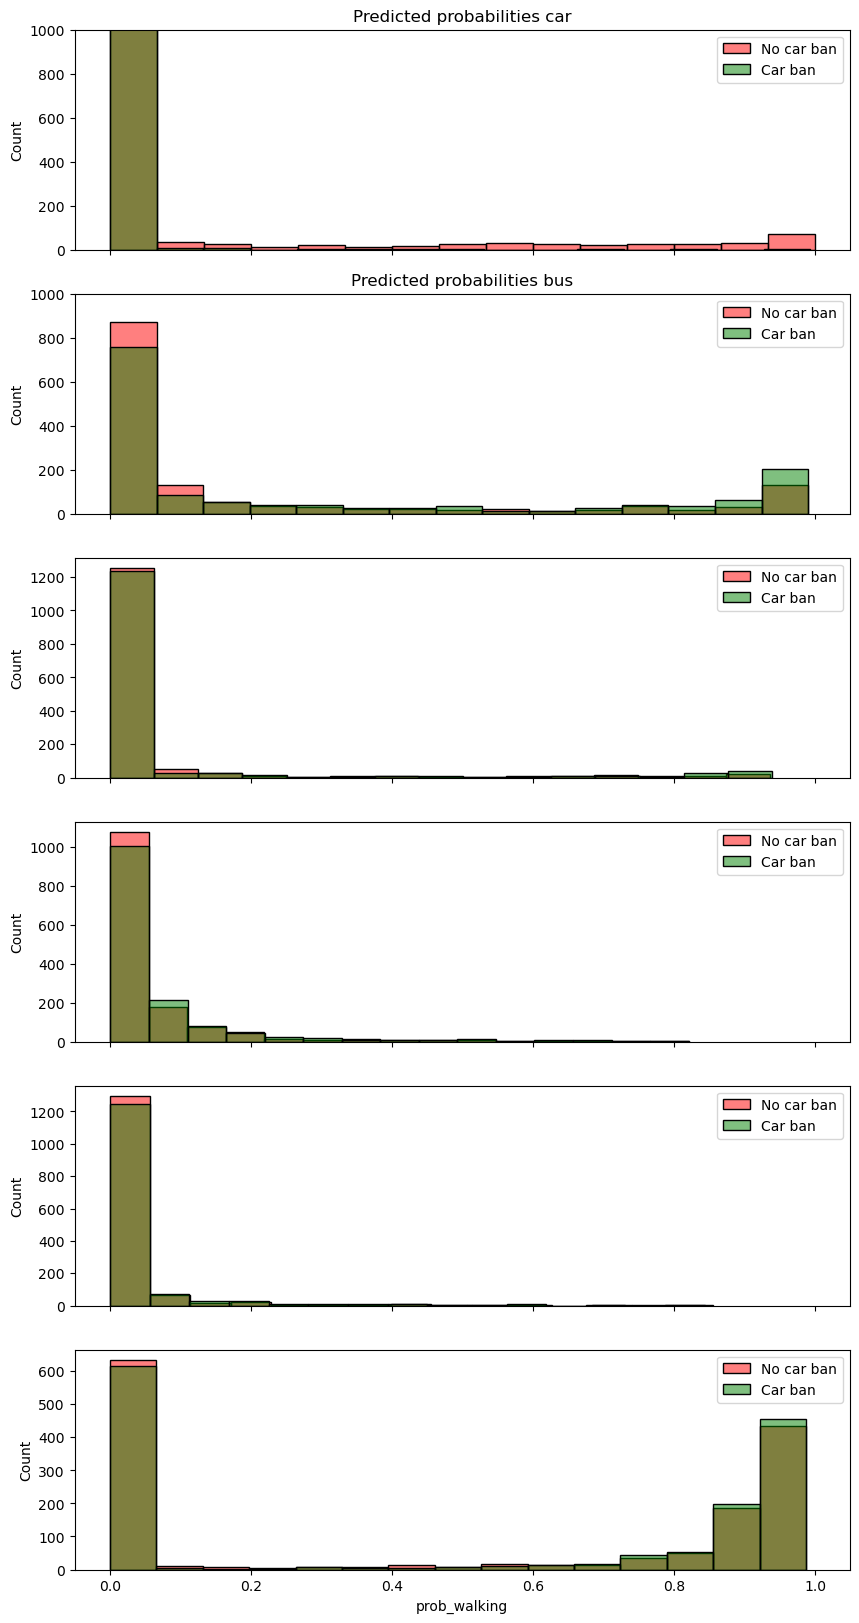

In [39]:
# Create histograms to compare the changes in the predictions
fig, axes = plt.subplots(6, 1, figsize=(10, 20), sharex=True)
sns.histplot(ax = axes[0], data=RegionC_df.prob_car, bins = 15, alpha = 0.5, color = 'r',label = 'No car ban')
sns.histplot(ax = axes[0], data=RegionC_carban_df.prob_car, bins = 15, alpha = 0.5, color = 'g',label = 'Car ban')

sns.histplot(ax = axes[1], data=RegionC_df.prob_bus, bins = 15, alpha = 0.5, color = 'r',label = 'No car ban')
sns.histplot(ax = axes[1], data=RegionC_carban_df.prob_bus, bins = 15, alpha = 0.5, color = 'g',label = 'Car ban')

sns.histplot(ax = axes[2], data=RegionC_df.prob_rail, bins = 15, alpha = 0.5, color = 'r',label = 'No car ban')
sns.histplot(ax = axes[2], data=RegionC_carban_df.prob_rail, bins = 15, alpha = 0.5, color = 'g',label = 'Car ban')

sns.histplot(ax = axes[3], data=RegionC_df.prob_taxi, bins = 15, alpha = 0.5, color = 'r',label = 'No car ban')
sns.histplot(ax = axes[3], data=RegionC_carban_df.prob_taxi, bins = 15, alpha = 0.5, color = 'g',label = 'Car ban')

sns.histplot(ax = axes[4], data=RegionC_df.prob_cycling, bins = 15, alpha = 0.5, color = 'r',label = 'No car ban')
sns.histplot(ax = axes[4], data=RegionC_carban_df.prob_cycling, bins = 15, alpha = 0.5, color = 'g',label = 'Car ban')

sns.histplot(ax = axes[5], data=RegionC_df.prob_walking, bins = 15, alpha = 0.5, color = 'r',label = 'No car ban')
sns.histplot(ax = axes[5], data=RegionC_carban_df.prob_walking, bins = 15, alpha = 0.5, color = 'g',label = 'Car ban')

axes[0].set_title('Predicted probabilities car')
axes[1].set_title('Predicted probabilities bus')
axes[0].set_ylim(0,1000)
axes[1].set_ylim(0,1000)

for i in range(0,6):
    axes[i].legend()

plt.show()

In [40]:
# Look at the information for the columns before the car ban
describe_RegionC_df = RegionC_df.loc[:,('prob_car', 'prob_bus','prob_rail','prob_taxi', 'prob_cycling','prob_walking')].describe()
describe_RegionC_df

,prob_car,prob_bus,prob_rail,prob_taxi,prob_cycling,prob_walking
count,1445.000000,1445.000000,1.445000e+03,1445.000000,1445.000000,1445.000000
mean,0.156033,0.217809,5.840007e-02,0.054306,0.030051,0.483400
std,0.302297,0.323874,1.795347e-01,0.091274,0.094416,0.445972
min,0.000041,0.000209,9.389832e-07,0.000130,0.000104,0.000020
25%,0.000188,0.020597,3.609460e-05,0.007705,0.001815,0.003223
50%,0.000538,0.043940,1.776485e-04,0.022486,0.004154,0.654947
75%,0.086022,0.260522,3.777739e-03,0.055938,0.012154,0.932916
max,0.998824,0.989594,9.361865e-01,0.820341,0.854468,0.986884


In [41]:
# Look at the information for the columns after the car ban
describe_RegionC_carban_df = RegionC_carban_df.loc[:,('prob_car', 'prob_bus','prob_rail','prob_taxi', 'prob_cycling','prob_walking')].describe()
describe_RegionC_carban_df

,prob_car,prob_bus,prob_rail,prob_taxi,prob_cycling,prob_walking
count,1445.000000,1445.000000,1.445000e+03,1445.000000,1445.000000,1445.000000
mean,0.005863,0.304312,7.660389e-02,0.067919,0.039061,0.506241
std,0.051288,0.371262,2.164979e-01,0.114776,0.104521,0.446685
min,0.000041,0.000187,8.407216e-07,0.000597,0.000165,0.000021
25%,0.000157,0.028300,4.271948e-05,0.008153,0.001955,0.003485
50%,0.000364,0.058463,1.972315e-04,0.028169,0.005220,0.772819
75%,0.001072,0.661387,6.495549e-03,0.069603,0.017115,0.935341
max,0.992927,0.989594,9.383773e-01,0.820341,0.843146,0.986884


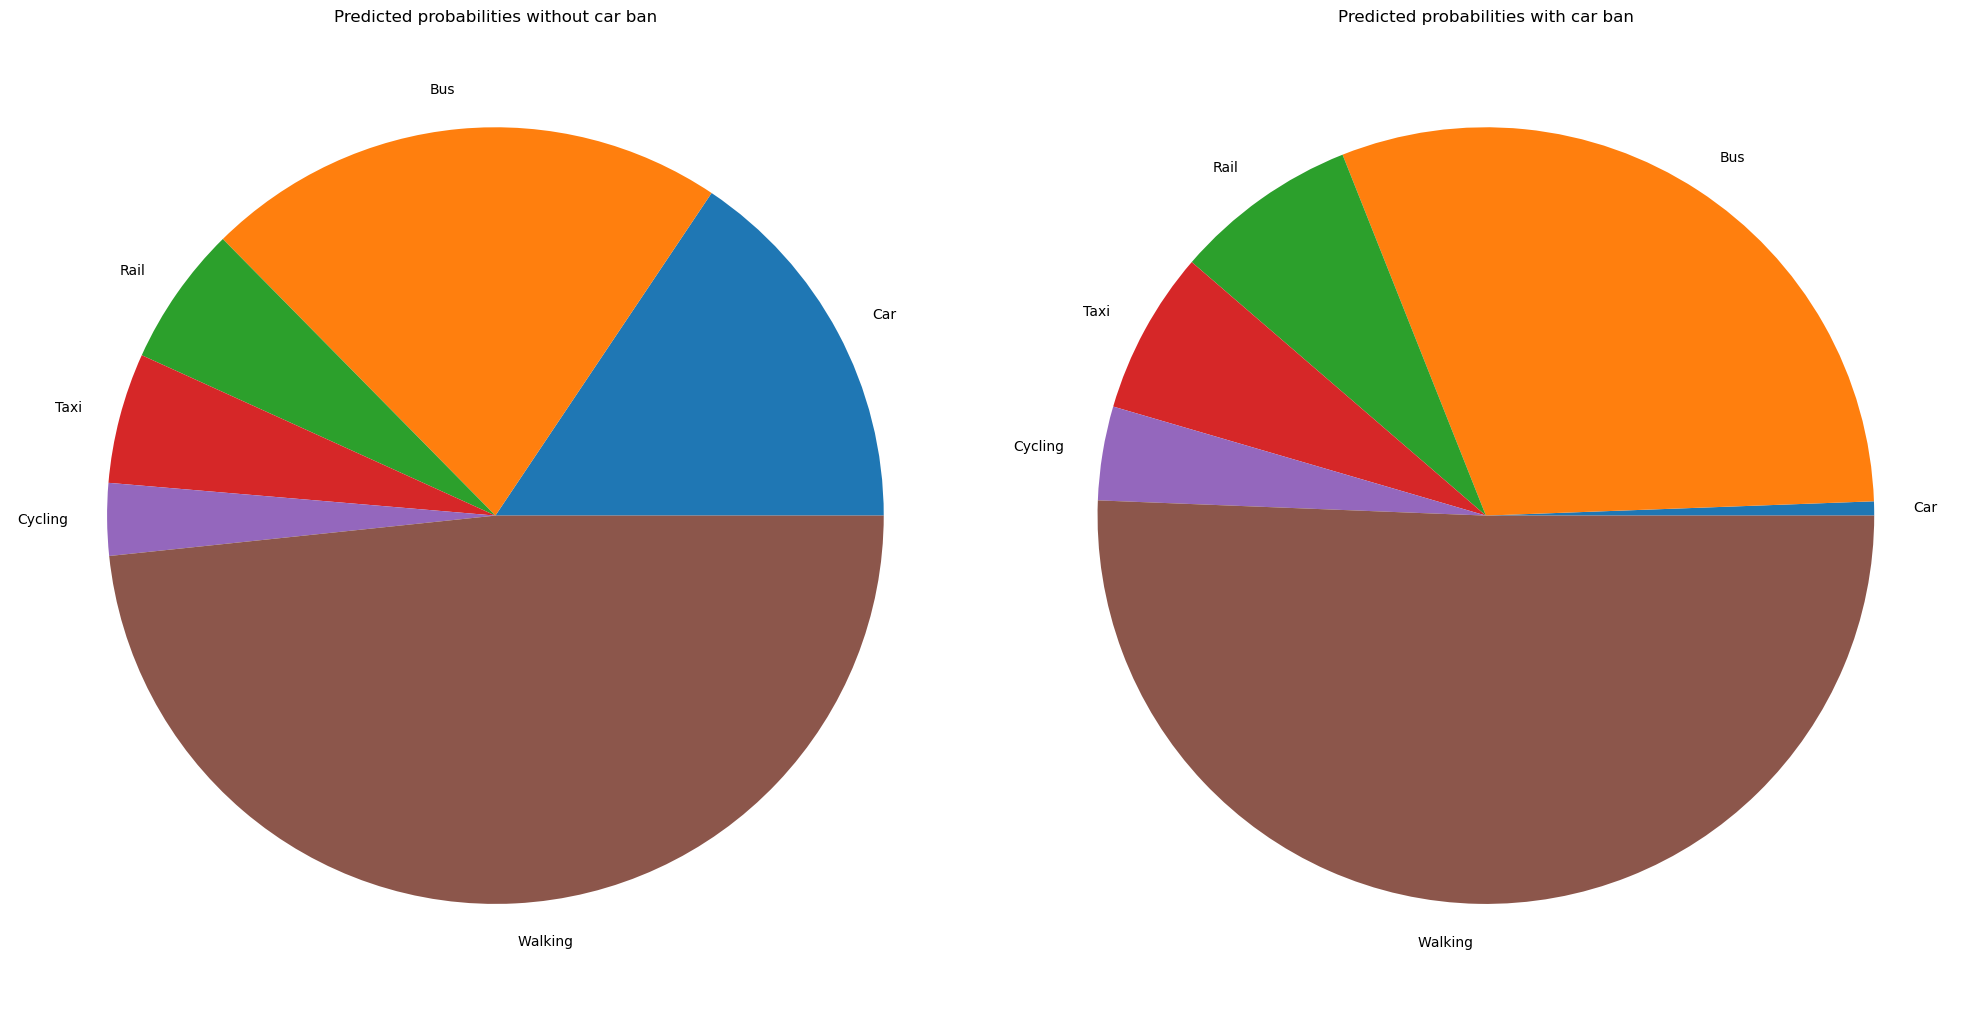

In [42]:
# Create a pie plot of the distributions before and after the car ban 
fig, axes = plt.subplots(1, 2, figsize=(20, 20), sharex=True)

labels = ['Car','Bus','Rail','Taxi', 'Cycling','Walking ']

axes[0].pie(describe_RegionC_df.loc['mean'], labels=labels, normalize = True)
axes[1].pie(describe_RegionC_carban_df.loc['mean'], labels=labels, normalize = True)

axes[0].set_title('Predicted probabilities without car ban')
axes[1].set_title('Predicted probabilities with car ban')

plt.tight_layout()
plt.show()

#### Question: By which mode have car trips most often been substituted?

Car trips have most often been substituted by Bus

#### 4.4.Reflect on your analysis: <br> 
`A` Do you think your analysis and results are meaningful? Why/why not? <br> 
`B` What are the main limitations of your analysis?

A: The results of the analysis does show a shift towards other transport options, mainly the bus. In this sense, the car ban is effective, as less people seem to take the car to the city centre. Whether this conclusion is meaningfull depends on the aim of the decision makers. Do they want people to take the car less or solely to have less cars in the city centre. If the aim is the last, a car ban is automatically effective as cars are no longer allowed. However, if the aim is to reduce car use, the model isn't fit to predict whether people will change their preferences. Perhaps they will travel by car to other places or take the car to the edge of the centre, and then take another mode of transport. 

B: One of the limitiations is that people could take the car for a part of their journey, and park it at the edge of the city centre. This would result in less cars in the centre, but not necessarily less car use. This is because the stops people can take are not taken into account.\
Furthermore, the information in the data is limited. The principle of 'put your money where your mouth is' doesn't apply within the data, since the datasets consists of surveys. So altough the model can predict a decrease in car use, it's possible people will make another choice once the ban is in place. 

Another feature of the model is that cars don't go to zero, while there is a car ban in place. Since the option to take a car is no longer possible, this result is not realistic. 